We are going to build a **SVM** to identify each of a large number of black-and-white rectangular pixel displays as one of the 26 capital letters in the English alphabet.

The character images were based on 20 different fonts and each letter within these 20 fonts was randomly distorted to produce a file of 20,000 unique stimuli.

Each stimulus was converted into 16 primitive numerical attributes (statistical moments and edge counts) which were then scaled to fit into a range of integer values from 0 through 15. We typically train on the first 16000 items and then use the resulting model to predict the letter category for the remaining 4000. See the article (P. W. Frey and D. J. Slate. "Letter Recognition Using Holland-style Adaptive Classifiers". (Machine Learning Vol 6 No.2 March 91)) for more details

## Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df=pd.read_csv('letterdata.csv')

In [4]:
df

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,D,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19996,C,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19997,T,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4
19998,S,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8


In [6]:
df.shape

(20000, 17)

## Split Data

In [8]:
x=np.array(df)[:,1:16]
y=np.array(df.letter)[:]

In [9]:
x_train=x[0:16000,0:17]
x_test=x[16001:,:]
y_train=y[:16000]
y_test=y[16001:]

## Build SVM Model

In [10]:
from sklearn import svm

model=svm.SVC(C=3)

In [12]:
model.fit(x_train,y_train)

SVC(C=3)

In [13]:
y_pred=model.predict(x_test)

In [14]:
y_pred

array(['N', 'V', 'I', ..., 'T', 'S', 'A'], dtype=object)

In [15]:
model.score(x_test,y_test)

0.927231807951988

In [17]:
y_grid=(np.column_stack([y_test,y_pred]))

In [18]:
y_grid

array([['N', 'N'],
       ['V', 'V'],
       ['I', 'I'],
       ...,
       ['T', 'T'],
       ['S', 'S'],
       ['A', 'A']], dtype=object)

In [21]:
import string
lab=list(string.ascii_uppercase[0:26])
plab=["Predicted"+ s for s in lab]

In [22]:
lab

['A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y',
 'Z']

In [23]:
plab

['PredictedA',
 'PredictedB',
 'PredictedC',
 'PredictedD',
 'PredictedE',
 'PredictedF',
 'PredictedG',
 'PredictedH',
 'PredictedI',
 'PredictedJ',
 'PredictedK',
 'PredictedL',
 'PredictedM',
 'PredictedN',
 'PredictedO',
 'PredictedP',
 'PredictedQ',
 'PredictedR',
 'PredictedS',
 'PredictedT',
 'PredictedU',
 'PredictedV',
 'PredictedW',
 'PredictedX',
 'PredictedY',
 'PredictedZ']

In [24]:
from sklearn import metrics
import seaborn as sns

cm=metrics.confusion_matrix(y_test,y_pred,labels=lab)

df_cm=pd.DataFrame(cm,index=[i for i in lab],
                  columns=[i for i in plab])

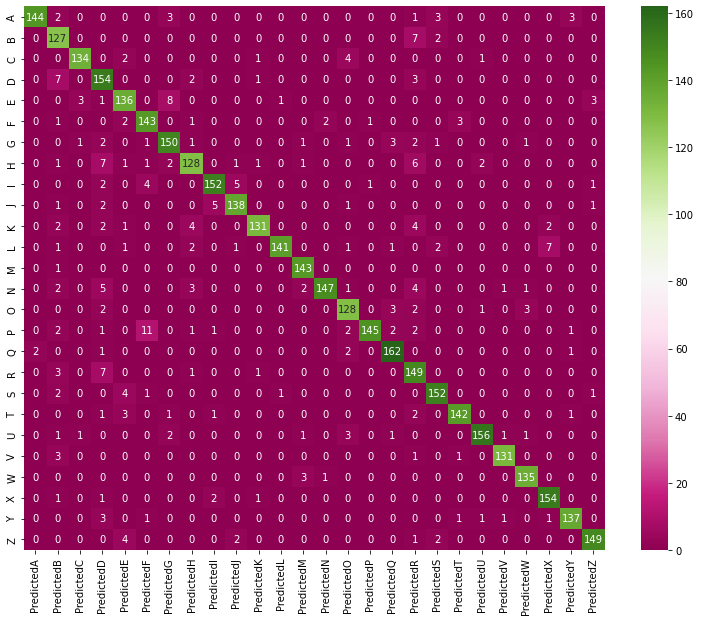

In [29]:
plt.figure(figsize=(13,10))
sns.heatmap(df_cm,annot=True,fmt='g',cmap="PiYG")
plt.show()